In [21]:
# Bloco 1: Imports e Configurações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração visual
plt.style.use("seaborn-v0_8")
sns.set_palette("pastel")
pd.set_option("display.max_columns", None)

In [23]:
# Bloco 2: Carregar os datasets
players = pd.read_csv("base_players.csv", sep=";")
lojas = pd.read_csv("lojas_valores.csv", sep=";")
transacoes = pd.read_csv("transacoes_cupons.csv", sep=";")
pedestres = pd.read_csv("pedestres_paulista.csv", sep=";")

# Mostrar dimensões
print("Players:", players.shape)
print("Lojas:", lojas.shape)
print("Transações:", transacoes.shape)
print("Pedestres:", pedestres.shape)

Players: (10000, 11)
Lojas: (10000, 11)
Transações: (100000, 12)
Pedestres: (100000, 15)


In [24]:
# Bloco 3: Verificar qualidade dos dados

def qualidade_dados(df, nome):
    print(f"\nDataset: {nome}")
    print("Dimensões:", df.shape)
    print("\nTipos de dados:")
    print(df.dtypes)
    print("\nValores ausentes:")
    print(df.isnull().sum())
    print("\nDuplicados:", df.duplicated().sum())
    print("="*60)

qualidade_dados(players, "Players")
qualidade_dados(lojas, "Lojas")
qualidade_dados(transacoes, "Transações")
qualidade_dados(pedestres, "Pedestres")


Dataset: Players
Dimensões: (10000, 11)

Tipos de dados:
celular                  object
data_nascimento          object
idade                     int64
sexo                     object
cidade_residencial       object
bairro_residencial       object
cidade_trabalho          object
bairro_trabalho          object
cidade_escola            object
bairro_escola            object
categoria_frequentada    object
dtype: object

Valores ausentes:
celular                     0
data_nascimento             0
idade                       0
sexo                        0
cidade_residencial          0
bairro_residencial          0
cidade_trabalho          3969
bairro_trabalho          3969
cidade_escola            6932
bairro_escola            6932
categoria_frequentada       0
dtype: int64

Duplicados: 0

Dataset: Lojas
Dimensões: (10000, 11)

Tipos de dados:
numero_celular     object
data_captura       object
tipo_cupom         object
tipo_loja          object
local_captura      object
latitude     

In [25]:
# Bloco 4: Tratamento básico dos dados

# Remover possíveis duplicados
players = players.drop_duplicates()
lojas = lojas.drop_duplicates()
transacoes = transacoes.drop_duplicates()
pedestres = pedestres.drop_duplicates()

# Remover possíveis valores ausentes
players = players.dropna()
lojas = lojas.dropna()
transacoes = transacoes.dropna()
pedestres = pedestres.dropna()

In [26]:
# Bloco 5: Pré-visualização
print("Players:")
display(players.head())

print("Lojas:")
display(lojas.head())

print("Transações:")
display(transacoes.head())

print("Pedestres:")
display(pedestres.head())


Players:


,celular,data_nascimento,idade,sexo,cidade_residencial,bairro_residencial,cidade_trabalho,bairro_trabalho,cidade_escola,bairro_escola,categoria_frequentada
17,(11) 96539-1344,03/08/1937,88,Outro,São Paulo,Lapa,São Paulo,Bela Vista,São Paulo,Campo Limpo,Supermercados de Bairro e Mercadinhos
22,(11) 98956-8886,13/07/1991,34,Masculino,São Paulo,Consolação,São Paulo,Sé,São Paulo,Limão,Lojas de Eletrodomésticos e Utilidades Domésticas
23,(11) 98973-3536,24/01/1971,54,Masculino,São Paulo,Consolação,São Paulo,República,São Paulo,Higienópolis,Postos de Combustível e Serviços Automotivos
26,(11) 97484-3144,30/04/2004,21,Outro,São Paulo,Jabaquara,São Paulo,Santana,São Paulo,Santana,Cafeterias e Bistrôs Modernos
29,(31) 95333-2891,18/09/1994,30,Masculino,São Paulo,Higienópolis,São Paulo,Casa Verde,São Paulo,Casa Verde,Lojas de Moda Urbana e Alternativa


Lojas:


,numero_celular,data_captura,tipo_cupom,tipo_loja,local_captura,latitude,longitude,nome_loja,endereco_loja,valor_compra,valor_cupom
0,(41) 96047-8110,05/07/2025,Produto,outros,Calçada aleatória,-23.563.850.985.754.000,-4.665.004.147.929.030,Pão de Açúcar,"Rua Pamplona, 1704",834.43,28.21
1,(11) 94020-8306,12/07/2025,Desconto,móveis,Calçada aleatória,-2.356.380.569.343.850,-4.664.954.309.104.300,Pão de Açúcar,"Rua Pamplona, 1704",884.21,398.81
2,(11) 92863-4530,19/07/2025,Produto,móveis,Shopping Cidade São Paulo,-23.563.227.246.012.400,-4.665.237.324.108.700,Kalunga,"Rua Augusta, 2220",903.79,48.43
3,(11) 94282-1224,19/07/2025,Produto,vestuário,Semáforo,-2.356.152.623.615.530,-4.665.376.976.958.120,Daiso Japan,"Shopping Pátio Paulista, Rua Treze de Maio, 1947",792.39,10.82
4,(11) 91506-1278,05/07/2025,Produto,outros,Shopping Pátio Paulista,-2.357.068.984.231.570,-46.645.488.231.986.900,Smart Fit,"Av. Paulista, 2006",146.92,8.34


Transações:


,celular,data,hora,nome_estabelecimento,bairro_estabelecimento,categoria_estabelecimento,id_campanha,id_cupom,tipo_cupom,produto,valor_cupom,repasse_picmoney
2,(11) 97965-2178,20/07/2025,16:45:00,Outback,Tucuruvi,Igrejas e Lojas de Artigos Religiosos,CAM6473,CUP670811,Produto,Tempora,719.06,27.61
3,(11) 93418-4646,20/07/2025,15:45:00,Subway,Penha,Fisioterapia e Terapias Complementares,CAM8293,CUP590364,Produto,Magnam,798.34,25.85
4,(11) 97973-1725,07/07/2025,11:00:00,Octavio Café,Santo Amaro,Clínicas Médicas e Laboratórios,CAM5588,CUP528033,Produto,Quam,718.45,28.85
5,(61) 99274-7566,16/07/2025,09:30:00,Madero,Pinheiros,Lojas de Moda Urbana e Alternativa,CAM6861,CUP623764,Produto,Eligendi,130.70,2.14
6,(11) 99900-5956,17/07/2025,08:45:00,Forever 21,Tatuapé,Espaços Culturais e de Experiência Interativa,CAM7963,CUP142621,Produto,Excepturi,446.41,5.28


Pedestres:


,celular,data,horario,local,latitude,longitude,tipo_celular,modelo_celular,possui_app_picmoney,data_ultima_compra,ultimo_tipo_cupom,ultimo_valor_capturado,ultimo_tipo_loja,idade,sexo
0,(11) 98549-4373,22/07/2025,07:30:00,Ponto de Ônibus Pamplona,-23.567.430.342.750.400,-4.664.844.333.528.140,iPhone,iPhone SE,Sim,22/06/2025,Cashback,215.39,mercado express,70,Feminino
3,(11) 94777-4030,22/07/2025,19:00:00,Metrô Consolação,-2.355.617.081.756.250,-4.666.130.627.469.660,Android,Motorola G60,Sim,15/07/2025,Desconto,42.18,outros,69,Masculino
4,(21) 91994-3239,22/07/2025,13:00:00,Esquina Rua da Paz,-2.356.254.630.989.870,-4.664.956.662.319.300,iPhone,iPhone 12,Sim,03/07/2025,Cashback,244.34,restaurante,67,Masculino
6,(11) 94559-2684,22/07/2025,12:15:00,MASP,-23.561.531.245.538.800,-4.665.609.027.000.710,iPhone,iPhone 11,Sim,18/07/2025,Produto,255.58,esportivo,52,Feminino
7,(11) 91185-9749,22/07/2025,08:00:00,Shopping Cidade São Paulo,-2.356.305.240.568.520,-46.652.317.302.801.800,Android,Samsung S21,Sim,06/07/2025,Desconto,24.55,farmácia,54,Outro


In [27]:
# Bloco 6: Estatísticas descritivas
print("Descrição - Players")
display(players.describe(include="all").T)

print("Descrição - Lojas")
display(lojas.describe(include="all").T)

print("Descrição - Transações")
display(transacoes.describe(include="all").T)

print("Descrição - Pedestres")
display(pedestres.describe(include="all").T)


Descrição - Players


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
celular,1863,1863,(11) 95040-8919,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data_nascimento,1863,1798,14/11/1991,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
idade,1863.0,NaN,NaN,NaN,53.119163,21.292797,16.0,35.0,53.0,71.0,91.0
sexo,1863,3,Masculino,635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cidade_residencial,1863,147,São Paulo,1677,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bairro_residencial,1863,21,Santana,103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cidade_trabalho,1863,1,São Paulo,1863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bairro_trabalho,1863,21,Sé,236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cidade_escola,1863,1,São Paulo,1863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bairro_escola,1863,21,Higienópolis,245,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Descrição - Lojas


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
numero_celular,10000,9999,(11) 98154-1108,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data_captura,10000,31,12/07/2025,1261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tipo_cupom,10000,3,Cashback,3340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tipo_loja,10000,8,esportivo,1345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
local_captura,10000,7,Calçada aleatória,2503,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,10000,10000,-2.356.380.731.240.190,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,10000,10000,-46.649.952.482.413.200,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nome_loja,10000,15,Havaianas,709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
endereco_loja,10000,14,"Shopping Pátio Paulista, Rua Treze de Maio, 1947",1297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
valor_compra,10000.0,NaN,NaN,NaN,549.684075,260.762003,100.09,323.385,548.885,776.26,999.92


Descrição - Transações


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
celular,33328,4669,(11) 92941-5524,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data,33328,31,21/07/2025,1145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hora,33328,65,16:00:00,564,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nome_estabelecimento,33328,33,Droga Raia,1460,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bairro_estabelecimento,33328,21,Butantã,1655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
categoria_estabelecimento,33328,29,Farmácias e Drogarias,2298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id_campanha,33328,8761,CAM2639,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id_cupom,33328,32659,CUP874427,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tipo_cupom,33328,1,Produto,33328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
produto,33328,182,Odio,212,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Descrição - Pedestres


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
celular,59957,59939,(11) 93106-1596,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data,59957,1,22/07/2025,59957,NaN,NaN,NaN,NaN,NaN,NaN,NaN
horario,59957,65,17:30:00,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
local,59957,10,Metrô Consolação,6117,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,59957,59957,-2.356.323.500.092.910,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,59957,59957,-4.665.240.912.152.810,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tipo_celular,59957,2,Android,41867,NaN,NaN,NaN,NaN,NaN,NaN,NaN
modelo_celular,59957,10,Realme C35,8531,NaN,NaN,NaN,NaN,NaN,NaN,NaN
possui_app_picmoney,59957,1,Sim,59957,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data_ultima_compra,59957,30,23/06/2025,2057,NaN,NaN,NaN,NaN,NaN,NaN,NaN


📌 KPIs para CEO & CFO
Clientes únicos: 1863
Lojas parceiras: 33
Volume total transacionado: R$ 5,496,840.75
Valor médio dos cupons: R$ 70.35
Ticket médio: R$ 549.68
Pedestres únicos registrados: 59957


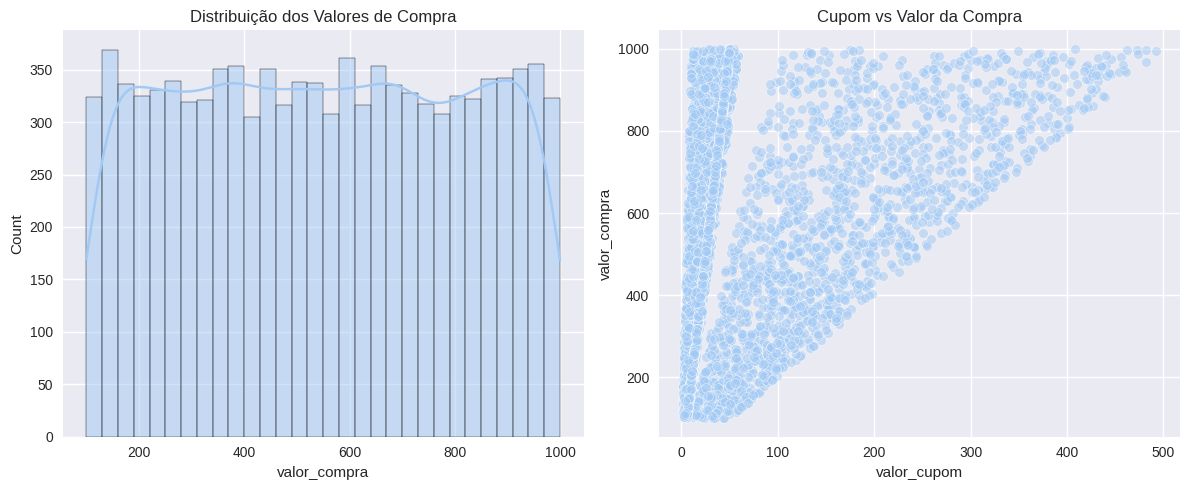

In [28]:
# Bloco 7: KPIs e análises

# KPI 1: Número de clientes únicos
clientes_totais = players.shape[0]

# KPI 2: Número de lojas parceiras
lojas_unicas = transacoes['nome_estabelecimento'].unique()

# KPI 3: Volume total transacionado
volume_total = lojas["valor_compra"].sum()

# KPI 4: Valor médio dos cupons
valor_medio_cupom = lojas["valor_cupom"].mean()

# KPI 5: Ticket médio por compra
ticket_medio = lojas["valor_compra"].mean()

# KPI 6: Número de pedestres únicos
pedestres_unicos = pedestres.shape[0]


print("📌 KPIs para CEO & CFO")
print(f"Clientes únicos: {clientes_totais}")
print(f"Lojas parceiras: {len(lojas_unicas)}")
print(f"Volume total transacionado: R$ {volume_total:,.2f}")
print(f"Valor médio dos cupons: R$ {valor_medio_cupom:,.2f}")
print(f"Ticket médio: R$ {ticket_medio:,.2f}")
print(f"Pedestres únicos registrados: {pedestres_unicos}")


# Visualizações
fig, axs = plt.subplots(1, 2, figsize=(12,5))

# Distribuição de valores de compra
sns.histplot(lojas["valor_compra"], bins=30, ax=axs[0], kde=True)
axs[0].set_title("Distribuição dos Valores de Compra")

# Relação cupom vs compra
sns.scatterplot(data=lojas.sample(5000), x="valor_cupom", y="valor_compra", alpha=0.5, ax=axs[1])
axs[1].set_title("Cupom vs Valor da Compra")

plt.tight_layout()
plt.show()